In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ecommerce_sales_data (2).csv')

In [3]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


# For Profit 

In [4]:
profitDF = df[['Order Date', 'Product Name', 'Category', 'Region', 'Profit']].copy()

In [5]:
profitDF.head()

,Order Date,Product Name,Category,Region,Profit
0,2024-12-31,Printer,Office,North,348.93
1,2022-11-27,Mouse,Accessories,East,106.53
2,2022-05-11,Tablet,Electronics,South,502.73
3,2024-03-16,Mouse,Accessories,South,202.87
4,2022-09-10,Mouse,Accessories,West,103.28


## EDA

In [6]:
profitDF.shape

(3500, 5)

In [7]:
profitDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Profit        3500 non-null   float64
dtypes: float64(1), object(4)
memory usage: 136.8+ KB


In [8]:
profitDF.describe()

,Profit
count,3500.000000
mean,527.047203
std,504.139732
min,6.970000
25%,158.695000
50%,361.070000
75%,729.125000
max,2946.930000


<Axes: xlabel='Profit', ylabel='Count'>

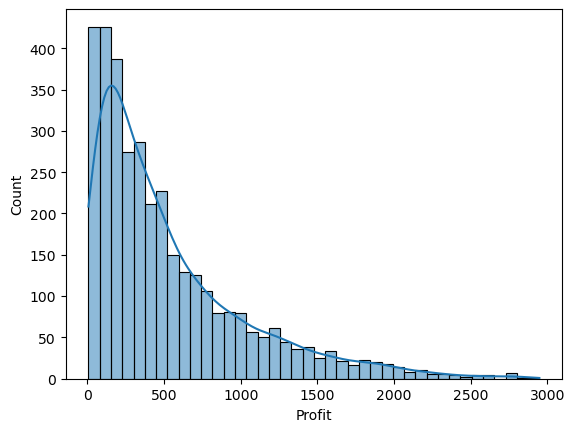

In [9]:
sns.histplot(profitDF['Profit'], kde = True)

In [10]:
profitDF.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Profit'], dtype='object')

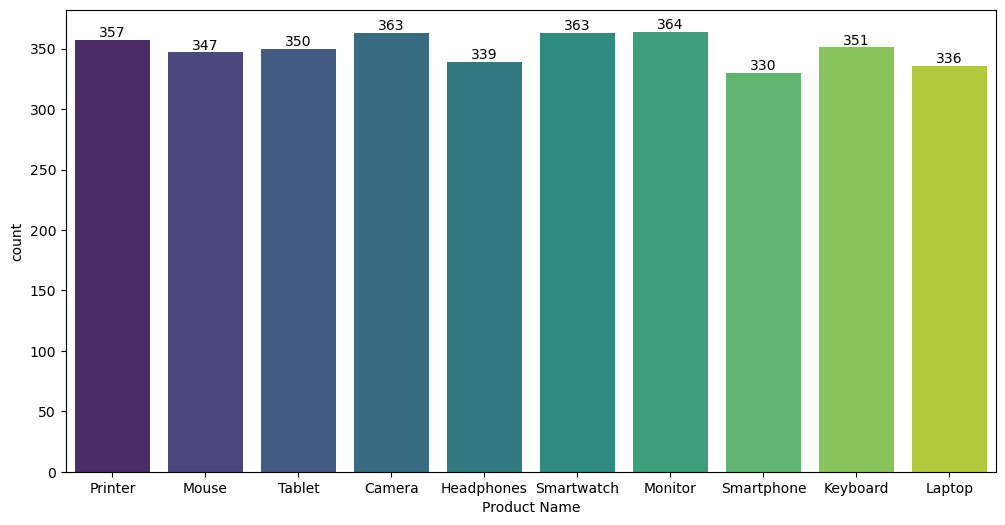

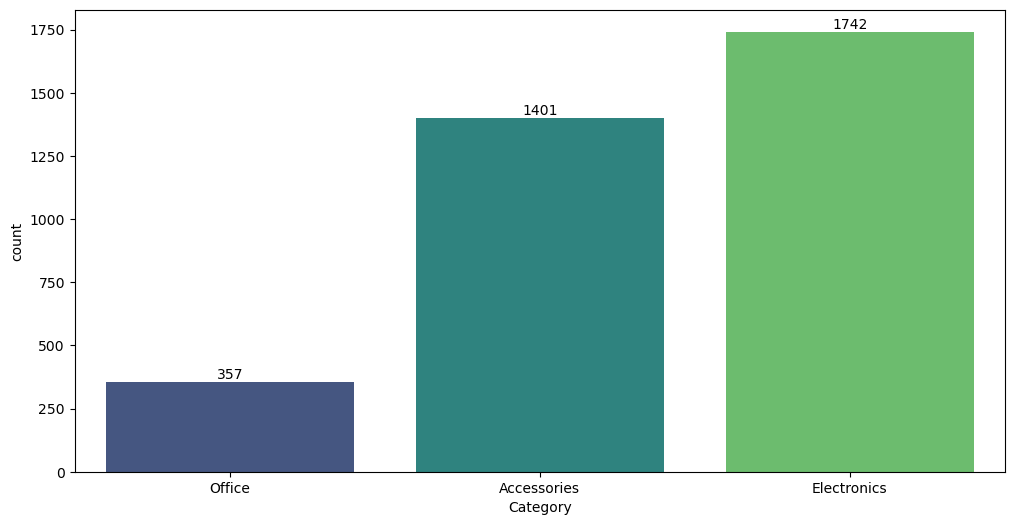

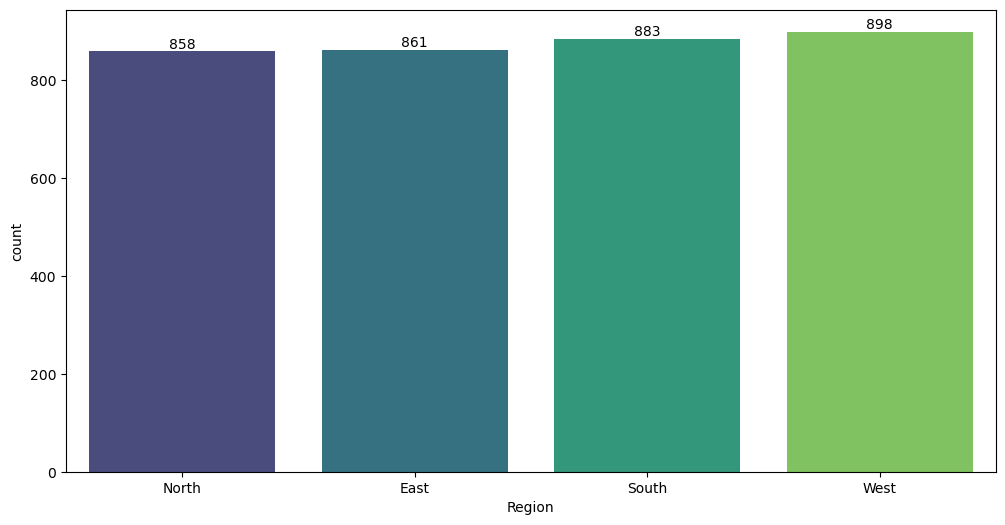

In [11]:
categoricalCol = ['Product Name', 'Category', 'Region']

for i in categoricalCol:
    plt.figure(figsize = (12,6))
    ax = sns.countplot(x = profitDF[i], palette = 'viridis')
    for j in ax.containers:
        ax.bar_label(j)
    plt.show()

## Data Cleaning

In [12]:
profitDF.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Profit          0
dtype: int64

In [13]:
profitDF.drop_duplicates(inplace = True)

In [14]:
profitDF.shape

(3500, 5)

## Data Processing 

In [15]:
profitDF.dtypes

Order Date       object
Product Name     object
Category         object
Region           object
Profit          float64
dtype: object

Now convert object or string into 0 & 1 but firstly we have to convert order date column into three difrent column

In [16]:
profitDF['Order Date'] = pd.to_datetime(profitDF['Order Date'])

In [17]:
profitDF['Order_Year']  = profitDF['Order Date'].dt.year
profitDF['Order_Month'] = profitDF['Order Date'].dt.month
profitDF['Order_Day']   = profitDF['Order Date'].dt.day
profitDF['Order_DayOfWeek'] = profitDF['Order Date'].dt.dayofweek

profitDF.drop(['Order Date'], inplace = True, axis = 1)

In [18]:
profitDF.head()

,Product Name,Category,Region,Profit,Order_Year,Order_Month,Order_Day,Order_DayOfWeek
0,Printer,Office,North,348.93,2024,12,31,1
1,Mouse,Accessories,East,106.53,2022,11,27,6
2,Tablet,Electronics,South,502.73,2022,5,11,2
3,Mouse,Accessories,South,202.87,2024,3,16,5
4,Mouse,Accessories,West,103.28,2022,9,10,5


In [19]:
profitDF.dtypes

Product Name        object
Category            object
Region              object
Profit             float64
Order_Year           int32
Order_Month          int32
Order_Day            int32
Order_DayOfWeek      int32
dtype: object

 Now converting product name value into True & False

In [20]:
profitDF['Product Name'].nunique()

10

In [21]:
profitDF['Product Name'].unique()

array(['Printer', 'Mouse', 'Tablet', 'Camera', 'Headphones', 'Smartwatch',
       'Monitor', 'Smartphone', 'Keyboard', 'Laptop'], dtype=object)

In [22]:
profitDF.rename(columns = {
    'Product Name' : 'Product_Name'
},inplace = True)

In [23]:
profitDF = pd.get_dummies(
    profitDF,
    columns=['Product_Name'],
    drop_first=True
)


In [24]:
profitDF.head()

,Category,Region,Profit,Order_Year,Order_Month,Order_Day,Order_DayOfWeek,Product_Name_Headphones,Product_Name_Keyboard,Product_Name_Laptop,Product_Name_Monitor,Product_Name_Mouse,Product_Name_Printer,Product_Name_Smartphone,Product_Name_Smartwatch,Product_Name_Tablet
0,Office,North,348.93,2024,12,31,1,False,False,False,False,False,True,False,False,False
1,Accessories,East,106.53,2022,11,27,6,False,False,False,False,True,False,False,False,False
2,Electronics,South,502.73,2022,5,11,2,False,False,False,False,False,False,False,False,True
3,Accessories,South,202.87,2024,3,16,5,False,False,False,False,True,False,False,False,False
4,Accessories,West,103.28,2022,9,10,5,False,False,False,False,True,False,False,False,False


Converting Category value into True & False

In [25]:
profitDF['Category'].unique()

array(['Office', 'Accessories', 'Electronics'], dtype=object)

In [26]:
profitDF = pd.get_dummies(
    profitDF,
    columns = ['Category'],
    drop_first = True
)

In [27]:
profitDF.head()

,Region,Profit,Order_Year,Order_Month,Order_Day,Order_DayOfWeek,Product_Name_Headphones,Product_Name_Keyboard,Product_Name_Laptop,Product_Name_Monitor,Product_Name_Mouse,Product_Name_Printer,Product_Name_Smartphone,Product_Name_Smartwatch,Product_Name_Tablet,Category_Electronics,Category_Office
0,North,348.93,2024,12,31,1,False,False,False,False,False,True,False,False,False,False,True
1,East,106.53,2022,11,27,6,False,False,False,False,True,False,False,False,False,False,False
2,South,502.73,2022,5,11,2,False,False,False,False,False,False,False,False,True,True,False
3,South,202.87,2024,3,16,5,False,False,False,False,True,False,False,False,False,False,False
4,West,103.28,2022,9,10,5,False,False,False,False,True,False,False,False,False,False,False


Converting region value into True & False

In [28]:
profitDF['Region'].unique()

array(['North', 'East', 'South', 'West'], dtype=object)

In [29]:
profitDF = pd.get_dummies(
    profitDF,
    columns = ['Region'],
    drop_first = True
)

In [30]:
profitDF.head()

,Profit,Order_Year,Order_Month,Order_Day,Order_DayOfWeek,Product_Name_Headphones,Product_Name_Keyboard,Product_Name_Laptop,Product_Name_Monitor,Product_Name_Mouse,Product_Name_Printer,Product_Name_Smartphone,Product_Name_Smartwatch,Product_Name_Tablet,Category_Electronics,Category_Office,Region_North,Region_South,Region_West
0,348.93,2024,12,31,1,False,False,False,False,False,True,False,False,False,False,True,True,False,False
1,106.53,2022,11,27,6,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,502.73,2022,5,11,2,False,False,False,False,False,False,False,False,True,True,False,False,True,False
3,202.87,2024,3,16,5,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,103.28,2022,9,10,5,False,False,False,False,True,False,False,False,False,False,False,False,False,True


Convert all the values into 0 & 1

In [31]:
profitDF = profitDF.astype(int)

In [32]:
profitDF.dtypes

Profit                     int64
Order_Year                 int64
Order_Month                int64
Order_Day                  int64
Order_DayOfWeek            int64
Product_Name_Headphones    int64
Product_Name_Keyboard      int64
Product_Name_Laptop        int64
Product_Name_Monitor       int64
Product_Name_Mouse         int64
Product_Name_Printer       int64
Product_Name_Smartphone    int64
Product_Name_Smartwatch    int64
Product_Name_Tablet        int64
Category_Electronics       int64
Category_Office            int64
Region_North               int64
Region_South               int64
Region_West                int64
dtype: object

In [33]:
profitDF.columns

Index(['Profit', 'Order_Year', 'Order_Month', 'Order_Day', 'Order_DayOfWeek',
       'Product_Name_Headphones', 'Product_Name_Keyboard',
       'Product_Name_Laptop', 'Product_Name_Monitor', 'Product_Name_Mouse',
       'Product_Name_Printer', 'Product_Name_Smartphone',
       'Product_Name_Smartwatch', 'Product_Name_Tablet',
       'Category_Electronics', 'Category_Office', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

In [34]:
profitDF.head()

,Profit,Order_Year,Order_Month,Order_Day,Order_DayOfWeek,Product_Name_Headphones,Product_Name_Keyboard,Product_Name_Laptop,Product_Name_Monitor,Product_Name_Mouse,Product_Name_Printer,Product_Name_Smartphone,Product_Name_Smartwatch,Product_Name_Tablet,Category_Electronics,Category_Office,Region_North,Region_South,Region_West
0,348,2024,12,31,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1,106,2022,11,27,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,502,2022,5,11,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,202,2024,3,16,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,103,2022,9,10,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Feature Scaling

In [35]:
profitDF.columns

Index(['Profit', 'Order_Year', 'Order_Month', 'Order_Day', 'Order_DayOfWeek',
       'Product_Name_Headphones', 'Product_Name_Keyboard',
       'Product_Name_Laptop', 'Product_Name_Monitor', 'Product_Name_Mouse',
       'Product_Name_Printer', 'Product_Name_Smartphone',
       'Product_Name_Smartwatch', 'Product_Name_Tablet',
       'Category_Electronics', 'Category_Office', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col = ['Order_Year', 'Order_Month', 'Order_Day', 'Order_DayOfWeek']

profitDF[col] = scaler.fit_transform(profitDF[col])

In [37]:
profitDF.head()

,Profit,Order_Year,Order_Month,Order_Day,Order_DayOfWeek,Product_Name_Headphones,Product_Name_Keyboard,Product_Name_Laptop,Product_Name_Monitor,Product_Name_Mouse,Product_Name_Printer,Product_Name_Smartphone,Product_Name_Smartwatch,Product_Name_Tablet,Category_Electronics,Category_Office,Region_North,Region_South,Region_West
0,348,1.197433,1.592062,1.762361,-1.032669,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1,106,-1.273685,1.301948,1.303421,1.481830,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,502,-1.273685,-0.438735,-0.532337,-0.529769,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,202,1.197433,-1.018963,0.041337,0.978931,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,103,-1.273685,0.721720,-0.647072,0.978931,0,0,0,0,1,0,0,0,0,0,0,0,0,1
